# DFT Geometry

Material based on Schoenberg, _The Finite Fourier Series and Elementary Geometry_.

- Refactor this so that polygons are made of np.arrays not lists. OK
- Annotate polygon vertices with numberings $0,\ldots N-1$. OK
- axes setup function should take lim (x,y limits) argument. OK
- find a way to plot list of vertex labels.
- schoenberg polygon power =>rename=> primitive polygon. OK
- separate graphics functions entirely. OK
- turn off/on polygon vertex labels. OK
- don't annotate if k divides N. OK
- something wrong in final graphic, the linear combination. OK
- keyword arg for fontsize in annotations. OK
- keyword arg for annotation offset factor. OK
- primitive polygons of 2^n must be special, do 2^4. OK

In [1]:
import numpy as np
from math import sin, cos, pi
from cooley import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Inverse DFT and DFT.

# j-th root of unity of order N.

def w(N,j):
    return np.exp(2*np.pi*1j*j/N)

# Matrix of roots of unity.

def W(N):
    # this generates correct array of j,a in (w_N^j)^a
    return np.array([[w(N,j)**a for a in range(N)] for j in range(N)])
    
def iW(N):
    # can also do np.lingalg.inv(W(N))
    return (1/N)*W(N).conjugate()
        
# Construct complex number by giving angle and length.
def argnorm(arg, norm):
    return norm * np.exp(1.j * (arg*np.pi/180.0))

# So DFT of polygon X is A = iW.X and inverse DFT is X = W.A.

# primitive polygons and their powers.
def primitive_polygon(N, a):    
    return W(N)[:,a]

# Plot cumulative sum of the linear combination
# X = A(0)*S_N^0 + A(1)*S_N^1 + ... + A(5)*S_N^5
# where S_N^a is a primitive polygon of order N and power a.
# A primitive polygon power is one COLUMN of matrix W(N).
def primitive_polygon_linear_combination(N, coeffs):
    return np.add.reduce([c*primitive_polygon(N,k) 
                          for k,c in enumerate(coeffs)])

In [3]:
# grapnics

def unit_circle_plot(ax):
    unit_circle_t = np.linspace(0, 2*np.pi, 100)
    ax.plot(np.cos(unit_circle_t), 
            np.sin(unit_circle_t), 
            lw=1, color='red', alpha=0.2)

def axes_setup(ax, lim):
    ax.set_aspect('equal')
    ax.axhline(y=0, color='gray', alpha=0.3, lw=1)
    ax.axvline(x=0, color='gray', alpha=0.3, lw=1)
    ax.axis('off')
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    
# When plotting polygon edges, we need to close the polygon 
# by appending first point last.

def polygon_plot(ax, zs, annotate=True, fontsize=5, offset_factor=0.5):
    ax.scatter(np.real(zs), np.imag(zs), s=4, color='black', alpha=0.3)
    zs_cycle = list(zs)
    zs_cycle.append(zs[0])
    ax.plot(np.real(zs_cycle), 
            np.imag(zs_cycle), 
            lw=1, color='blue', alpha=0.5)
    if annotate:
        for i, label in enumerate([str(u) for u in range(len(zs))]):
            z = zs[i]
            z += offset_factor * z/np.abs(z)
            x = np.real(z)
            y = np.imag(z)
            ax.annotate(label, (x, y), fontsize=fontsize, ha='center', va='center')


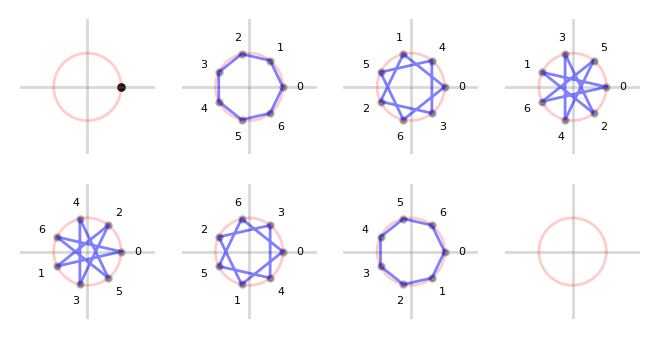

In [4]:
# Plot the powers of the primitive polygon of order N = 7.    
    
plt.rcParams['figure.figsize'] = [4, 2]
plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(2,4)
N = 7
power = 0
lim = 2
for i in range(2):
    for j in range(4):
        if power >= N:
            axes_setup(ax[i,j], lim)
            unit_circle_plot(ax[i,j])
            break
        axes_setup(ax[i,j], lim)
        unit_circle_plot(ax[i,j])
        polygon_plot(ax[i,j], 
                     primitive_polygon(N,power), 
                     annotate=power!=0,
                     fontsize=4)
        power += 1
        
#plt.savefig("primitive7.png")

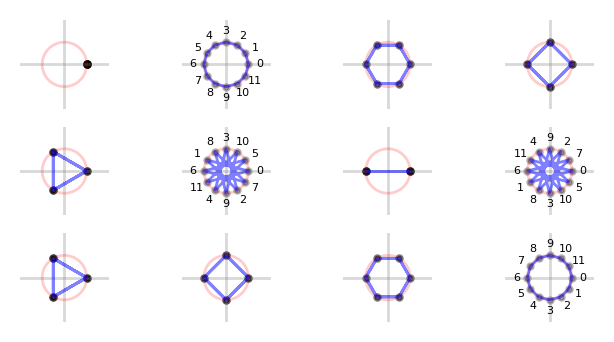

In [5]:
# Primitive polygon powers of order N = 12.    
    
plt.rcParams['figure.figsize'] = [4, 2]
plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(3,4)
N = 12
power = 0
lim = 2
for i in range(3):
    for j in range(4):
        if power >= N:
            axes_setup(ax[i,j], lim)
            unit_circle_plot(ax[i,j])
            break
        axes_setup(ax[i,j], lim)
        unit_circle_plot(ax[i,j])
        polygon_plot(ax[i,j], 
                     primitive_polygon(N,power), 
                     annotate=np.gcd(N,power)==1,
                     fontsize=4)
        power += 1
        
#plt.savefig("primitive12.png") #, transparent=False)

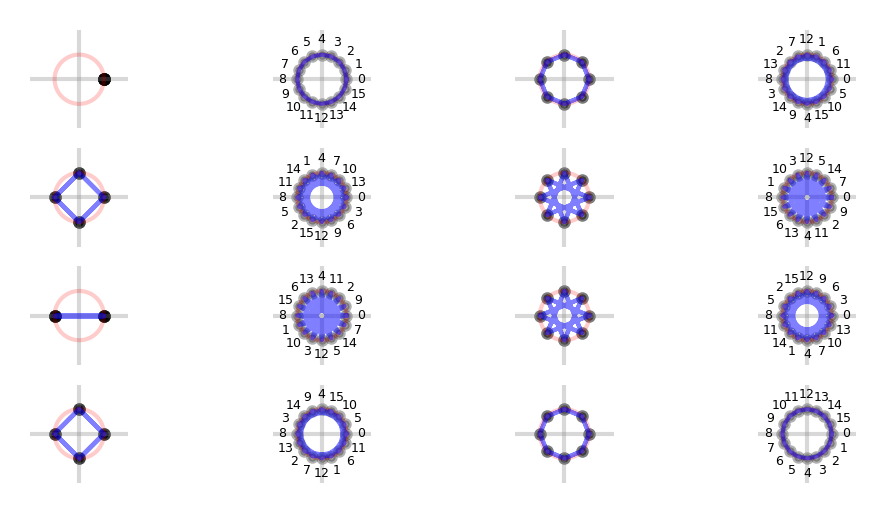

In [6]:
# Primitive polygon powers of order N = 16.
# Is there something special when N is a power of 2?
    
plt.rcParams['figure.figsize'] = [4, 2]
plt.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(4,4)
N = 16
power = 0
lim = 2
for i in range(4):
    for j in range(4):
        if power >= N:
            axes_setup(ax[i,j], lim)
            unit_circle_plot(ax[i,j])
            break
        axes_setup(ax[i,j], lim)
        unit_circle_plot(ax[i,j])
        polygon_plot(ax[i,j], 
                     primitive_polygon(N,power), 
                     annotate=np.gcd(N,power)==1,
                     fontsize=3,
                     offset_factor=0.6)
        power += 1
        
#plt.savefig("primitive16.png")

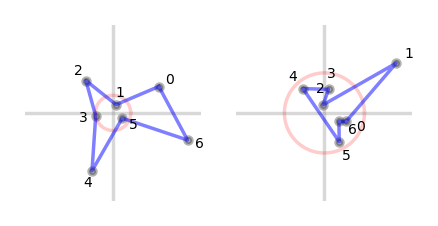

In [27]:
# Decompose a test polygon into linear homothetic combination of primitive prolygons.

#X = [argnorm(30,2.0), argnorm(70,1.8), argnorm(130, 1.6),
#     argnorm(190, 2.5), argnorm(260, 1.7), argnorm(330,2.5),
#     argnorm(340,1.5)]

X = [argnorm(30, 3.0), argnorm(70, 0.5), argnorm(130, 2.4),
     argnorm(190, 1.0), argnorm(250, 3.5), argnorm(330, 0.6),
     argnorm(340, 4.5)]


# Compute the coefficients A of the linear combination.

A = iW(7) @ X

plt.rcParams['figure.figsize'] = [2, 1]
plt.rcParams['figure.dpi'] = 250
fig, ax = plt.subplots(1,2)
axes_setup(ax[0], 5)
unit_circle_plot(ax[0])
polygon_plot(ax[0], X, fontsize=4, offset_factor=0.7)
axes_setup(ax[1], 2.2)
unit_circle_plot(ax[1])
polygon_plot(ax[1], A, fontsize=4, offset_factor=0.4)

#plt.savefig("test_polygon_X_A.png")

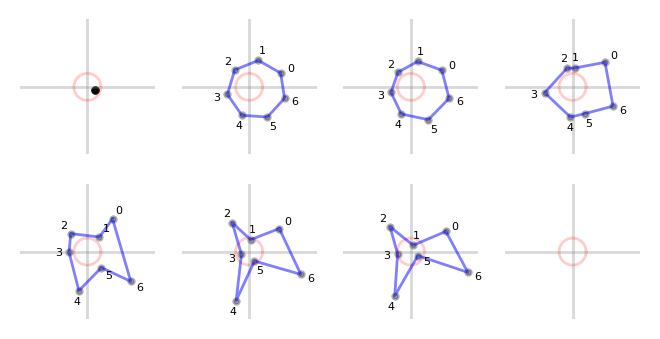

In [8]:
# (1) Homothetic combination of primitive polygon powers.
# We do it incrementally, or rather cumulatively, to show
# how the Fourier expansion "converges" to the test polygon.

lim = 5
plt.rcParams['figure.figsize'] = [4, 2]
plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(2,4)
power = 0
for i in range(2):
    for j in range(4):
        if power >= 7:
            axes_setup(ax[i,j], lim)
            unit_circle_plot(ax[i,j])
            break
        axes_setup(ax[i,j], lim)
        unit_circle_plot(ax[i,j])
        polygon_plot(ax[i,j], 
                     primitive_polygon_linear_combination(7, A[0:power+1]),
                     annotate=power!=0,
                     fontsize=4,
                     offset_factor=0.8)
        power += 1
        
        
#plt.savefig("convergence7.png")

In [9]:
# (2) Decompose test polygon as linear combination of affinely 
# transformed primitive polygons. 


In [10]:
# cross-ratio, lines, conics.


def cross_ratio(z):
    a = (z[0] - z[2])/(z[1] - z[2])
    b = (z[0] - z[3])/(z[1] - z[3])
    return a/b

XX = X[0:4]
AA = iW(4) @ XX

print(cross_ratio(X[0:4]))
print(1/(cross_ratio(A[0:4]/(cross_ratio(A[0:4])+1))))


(0.4993073301034135+0.39020835424170697j)
(1.4342492205948039-0.4337611348182456j)
